In [1]:
%matplotlib inline
import math
import os 
import glob
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.colors as cl
import matplotlib.ticker as mtick
from matplotlib.gridspec import GridSpec
import statsmodels.api as sm
from pandas import ExcelWriter
import pickle
import scipy as sp
from itertools import repeat

In [2]:
def load_object(filename):
    with open(filename, 'rb') as fid:
        file = pickle.load(fid)
    return file

In [3]:
#load the codes
Qian2016codes = load_object('models/revision/Qian2016codes_2.pkl')
Qian2018codes = load_object('models/revision/Qian2018codes_2.pkl')
QianU2019codes = load_object('models/revision/QianU2019codes_2.pkl')
QianR2019codes = load_object('models/revision/QianR2019codes_2.pkl')
Sourcecodes = load_object('models/revision/Sourcecodes_2.pkl')
Sourcetrainingcodes = load_object('models/revision//Sourcesamples_trainingcodes_2.pkl')
Sourcetestingcodes = load_object('models/revision//Sourcesamples_testingcodes_2.pkl')

#Load the DFs
Qian2016DF, Qian2016prob, Qian2016keys = load_object('models/revision/Qian2016DF_2.pkl')
Qian2018DF, Qian2018prob, Qian2018keys = load_object('models/revision/Qian2018DF_2.pkl')
QianU2019DF, QianU2019prob, QianU2019keys = load_object('models/revision/QianU2019DF_2.pkl')
QianR2019DF, QianR2019prob, QianR2019keys = load_object('models/revision/QianR2019DF_2.pkl')
SourceDF, Sourceprob, Sourcekeys = load_object('models/revision/SourceDF_2.pkl')
SourcetrainingDF, Sourcetrainingprob, Sourcekeys = load_object('models/revision/SourcetrainingDF_2.pkl')
SourcetestingDF, Sourcetestingprob, Sourcekeys = load_object('models/revision/SourcetestingDF_2.pkl')

clustersdata = [Qian2016DF, Qian2018DF, QianU2019DF, QianR2019DF, SourceDF]
probdata = [Qian2016prob, Qian2018prob, QianU2019prob, QianR2019prob, Sourceprob]
airkeys = [Qian2016keys, Qian2018keys, QianU2019keys, QianR2019keys, Sourcekeys]

In [4]:
# use opentsne to visualize

from openTSNE import TSNE, TSNEEmbedding, affinity
from openTSNE.callbacks import ErrorLogger
from openTSNE import initialization

In [5]:
def index(data, label):
    mini = data.reset_index()[data.reset_index()['labels'] == label].index.min()
    maxi = data.reset_index()[data.reset_index()['labels'] == label].index.max()
    return mini,maxi

In [6]:
y_train = SourcetrainingDF['labels']
x_train = Sourcetrainingprob

In [44]:
%time init = initialization.pca(x_train, random_state=0)

Wall time: 220 ms


In [45]:
%%time
affinities = affinity.PerplexityBasedNN(
    x_train,
    perplexity=30,
    n_jobs=8,
    random_state=0,
)

Wall time: 15.3 s


In [46]:
embedding_standard = TSNEEmbedding(
    init,
    affinities,
    negative_gradient_method="fft",
    n_jobs=8,
)

In [47]:
%%time
embedding_standard.optimize(n_iter=250, exaggeration=12, momentum=0.5, inplace=True)

Wall time: 29.4 s


TSNEEmbedding([[-1.87570251, -5.93210969],
               [-5.73341013,  5.80574134],
               [11.52617682,  0.47253527],
               ...,
               [ 4.92291661, -0.95239206],
               [ 3.62403382, -8.65762876],
               [ 2.22325113,  2.01929847]])

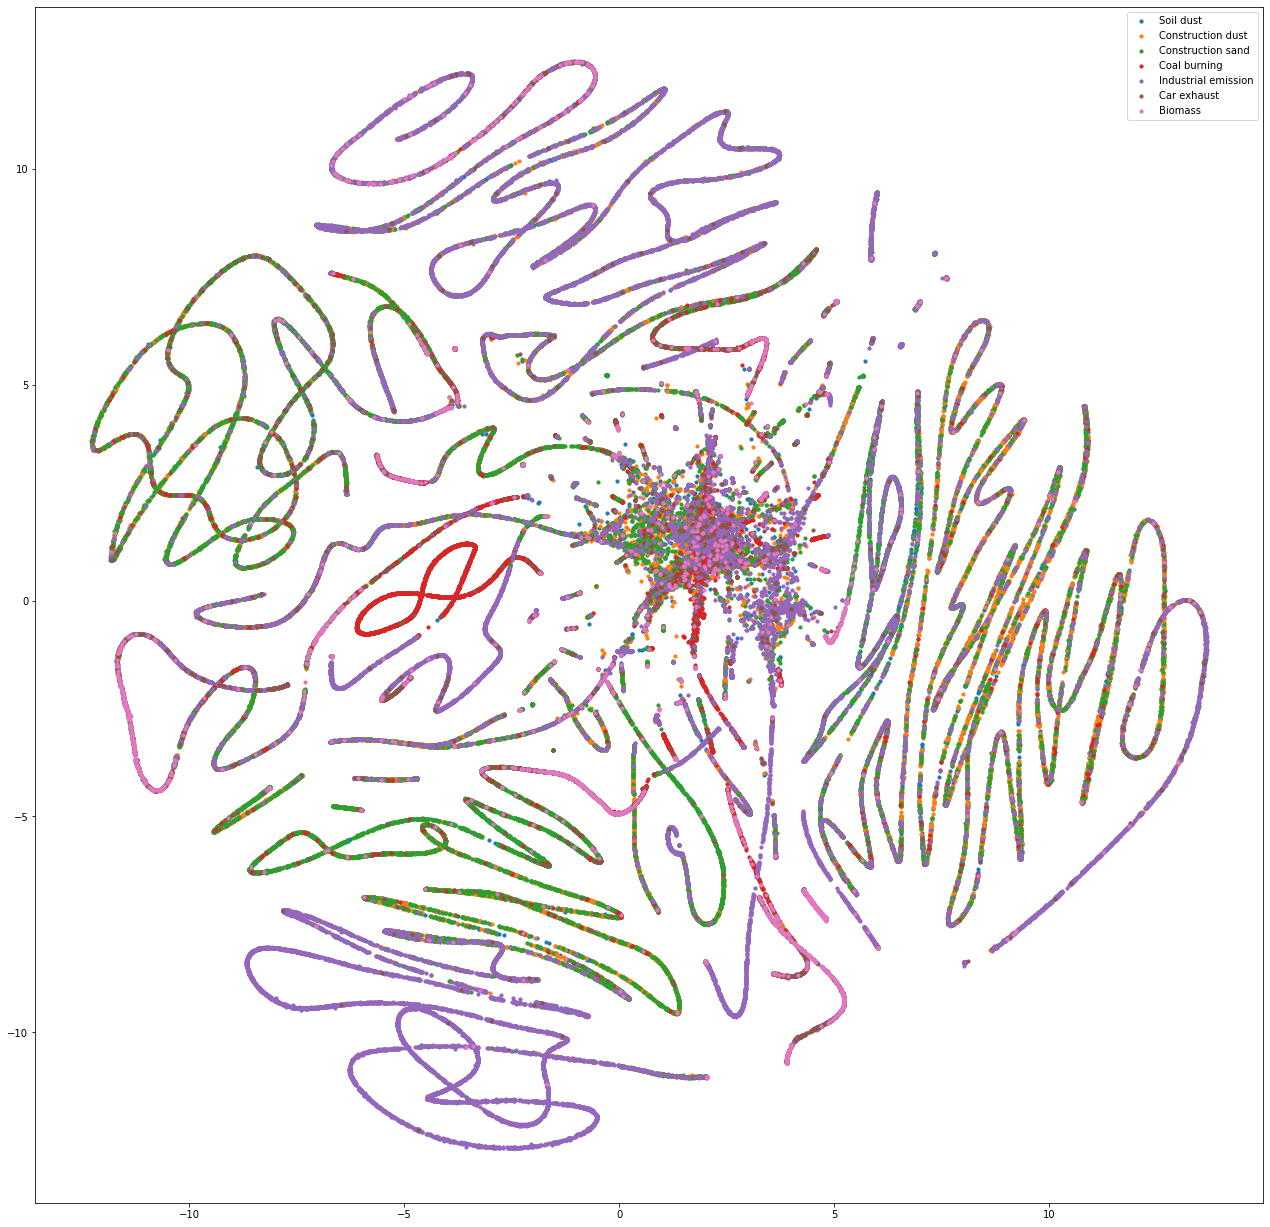

In [49]:
fig = plt.figure(figsize = (22,22))
for i in Sourcekeys:
    data = embedding_standard[index(SourcetrainingDF, i)[0]: index(SourcetrainingDF, i)[1]]
    plt.scatter(data[:,0], data[:,1], s = 10, label = i)
plt.legend()

In [76]:
#add noise to the data
def addnoise(df, noise, coefficient = None):
    if coefficient != None:
        df = df*coefficient
    df = df.fillna(0) + np.random.random(df.shape)*noise
    return df

In [6]:
ELEMENTS = ['48Ti', '52Cr', '55Mn', '54Fe', '59Co', '58Ni', '63Cu', '64Zn', '69Ga', '72Ge', '75As', '78Se', '85Rb', '88Sr', '89Y', '90Zr', '93Nb', 
           '98Mo', '108Pd', '107Ag', '114Cd', '120Sn', '121Sb', '130Te', '133Cs', '138Ba', '139La', '140Ce', '152Sm', '153Eu', '158Gd', '159Tb', '164Dy', '165Ho',
           '166Er', '169Tm', '174Yb', '175Lu', '180Hf', '185Re', '192Os', '193Ir', '195Pt', '197Au', '202Hg', '208Pb', '238U', '51V']

In [7]:
y_train = SourcetrainingDF['labels']
x_train = pd.DataFrame([datapoint[1]/datapoint[1].sum() for datapoint in SourcetrainingDF[ELEMENTS].iloc[:, :-3].iterrows()])

In [8]:
%%time
tsne = TSNE(
    perplexity=30,
    metric="euclidean",
    callbacks=ErrorLogger(),
    n_jobs=8,
    random_state=42,
)

Wall time: 1.49 ms


C:\Users\Garret Bland\Anaconda\envs\TOF classification\lib\site-packages\openTSNE\callbacks.py:52: FutureWarning: `ErrorLogger` will be removed in upcoming version. Please use the `verbose` flag instead.
  warnings.warn(


In [9]:
x_train = np.array(x_train.fillna(0))

In [ ]:
%time embedding_train = tsne.fit(x_train)

Iteration   50, KL divergence  9.4723, 50 iterations in 58.4947 sec


KeyboardInterrupt: 

Exception ignored in: 'openTSNE._matrix_mul.matrix_mul.matrix_multiply_fft_2d'
Traceback (most recent call last):
  File "<__array_function__ internals>", line 5, in irfft2
  File "C:\Users\Garret Bland\Anaconda\envs\TOF classification\lib\site-packages\numpy\fft\_pocketfft.py", line 1304, in irfft2
    return irfftn(a, s, axes, norm)
  File "<__array_function__ internals>", line 5, in irfftn
  File "C:\Users\Garret Bland\Anaconda\envs\TOF classification\lib\site-packages\numpy\fft\_pocketfft.py", line 1265, in irfftn
    a = irfft(a, s[-1], axes[-1], norm)
  File "<__array_function__ internals>", line 5, in irfft
  File "C:\Users\Garret Bland\Anaconda\envs\TOF classification\lib\site-packages\numpy\fft\_pocketfft.py", line 471, in irfft
    output = _raw_fft(a, n, axis, True, False, inv_norm)
  File "C:\Users\Garret Bland\Anaconda\envs\TOF classification\lib\site-packages\numpy\fft\_pocketfft.py", line 74, in _raw_fft
    r = pfi.execute(a, is_real, is_forward, fct)
KeyboardInterrupt:

In [ ]:
%%time
embedding_standard.optimize(n_iter=250, exaggeration=12, momentum=0.5, inplace=True)

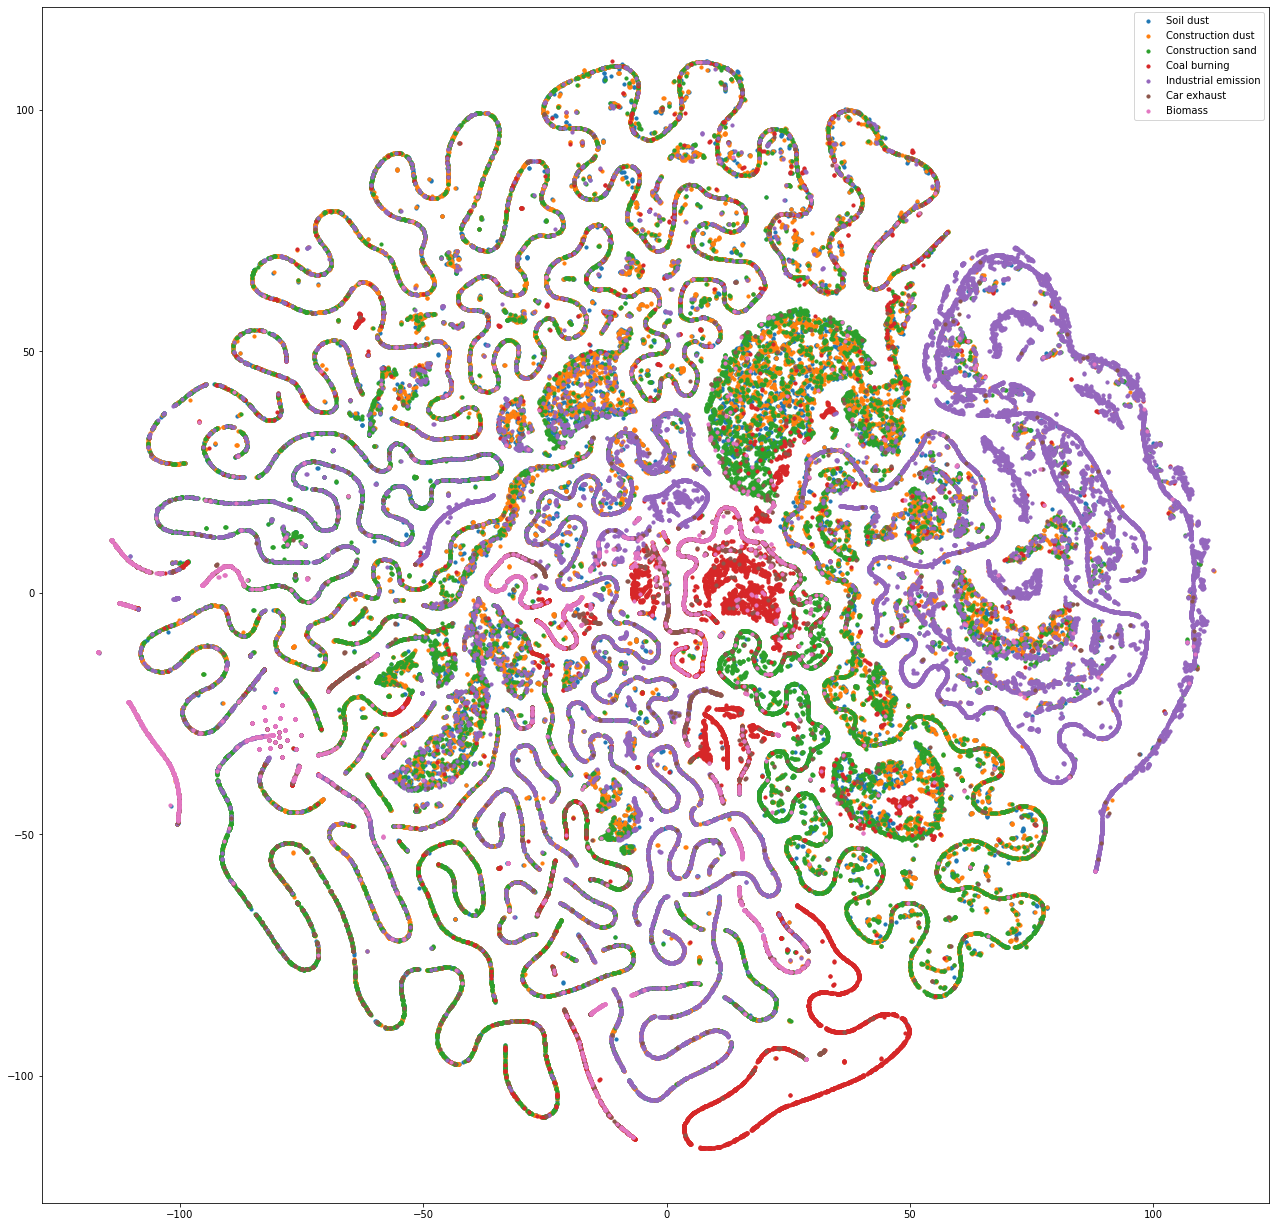

In [103]:
fig = plt.figure(figsize = (22,22))
for i in Sourcekeys:
    data = embedding_train[index(SourcetrainingDF, i)[0]: index(SourcetrainingDF, i)[1]]
    plt.scatter(data[:,0], data[:,1], s = 10, label = i)
plt.legend()